Starting Portfolio Value: 10000.00
Final Portfolio Value: 106195.13
Portfolio Return: 6.20%
Profit: 6195.13


                           Strategy
-------------------------  ----------
Start Period               2022-01-03
End Period                 2022-12-30
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          6.2%
CAGR﹪                     6.27%

Sharpe                     0.82
Prob. Sharpe Ratio         79.04%
Smart Sharpe               0.79
Sortino                    1.18
Smart Sortino              1.13
Sortino/√2                 0.83
Smart Sortino/√2           0.8
Omega                      1.17

Max Drawdown               -5.82%
Longest DD Days            105
Volatility (ann.)          7.69%
Calmar                     1.08
Skew                       -0.53
Kurtosis                   4.88

Expected Daily %           0.02%
Expected Monthly %         0.5%
Expected Yearly %          6.2%
Kelly Criterion            7.69%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.77%
Expected Shortfall (cVaR)  -0.77%

Max Consecutive Wins       8
Max 

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2022-06-17,2022-08-17,2022-09-30,105,-5.824743,-5.764887
2,2022-10-13,2022-10-28,2022-11-03,21,-3.393964,-2.915666
3,2022-11-10,2022-11-18,2022-12-16,36,-3.393581,-3.352159
4,2022-03-15,2022-03-29,2022-04-26,42,-1.498477,-1.476749
5,2022-10-03,2022-10-05,2022-10-12,9,-1.488321,-1.431472


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


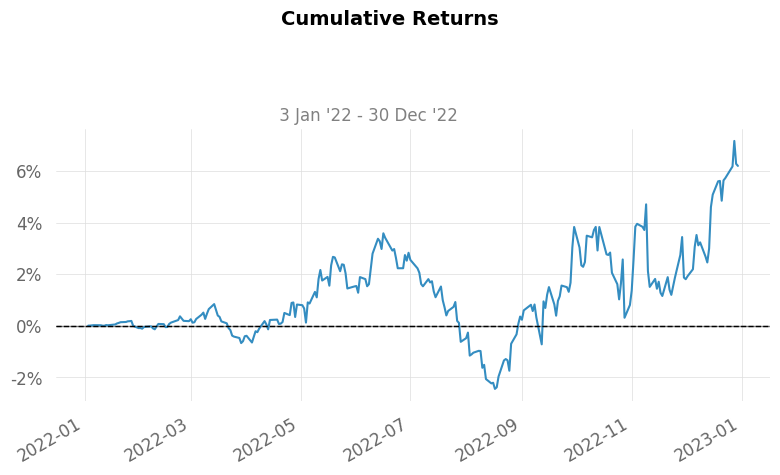

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


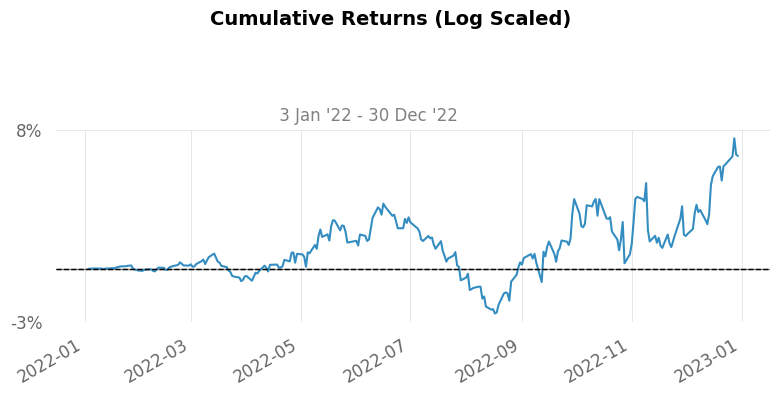

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


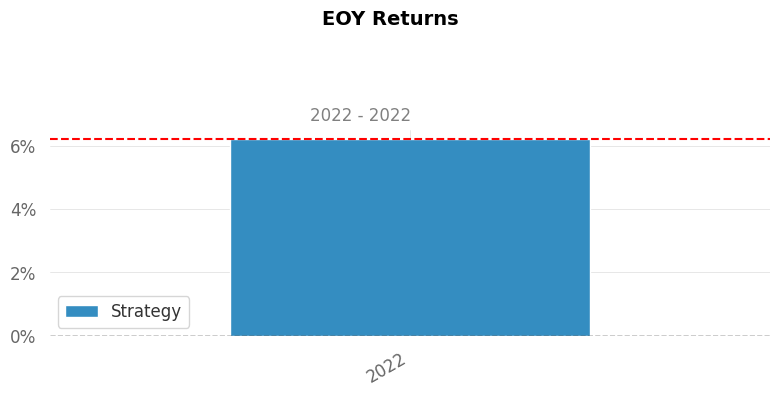

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


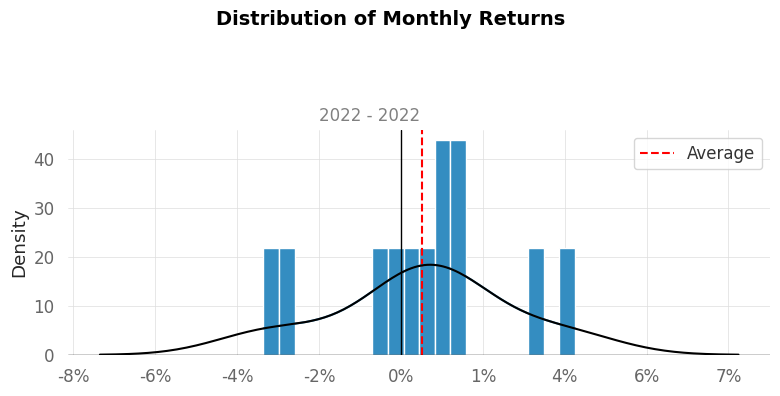

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


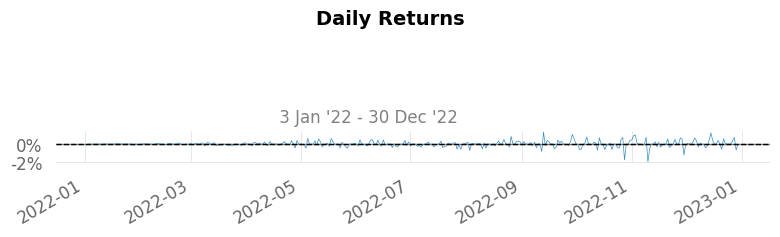

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


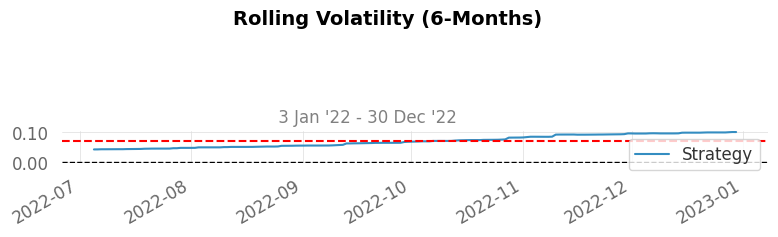

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


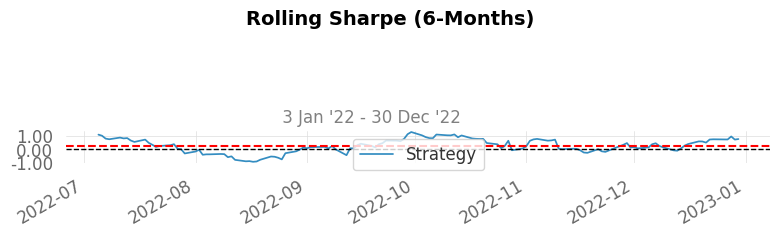

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


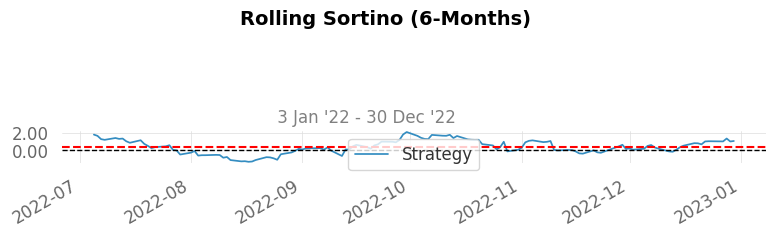

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


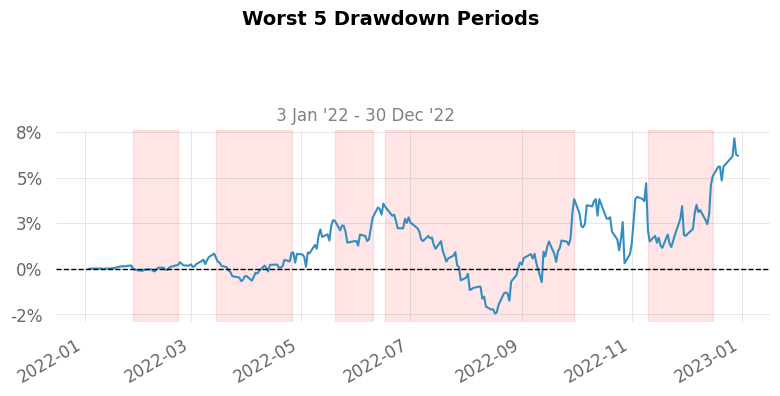

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


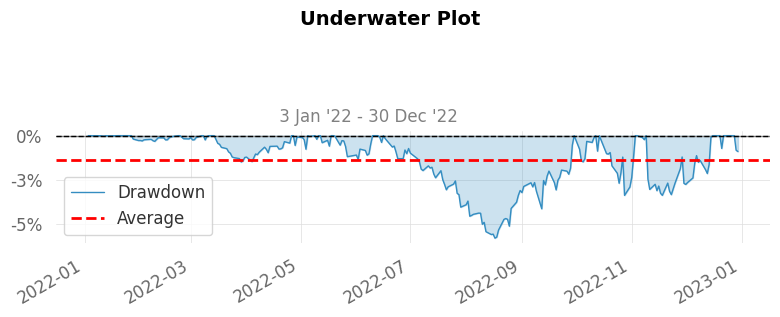

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


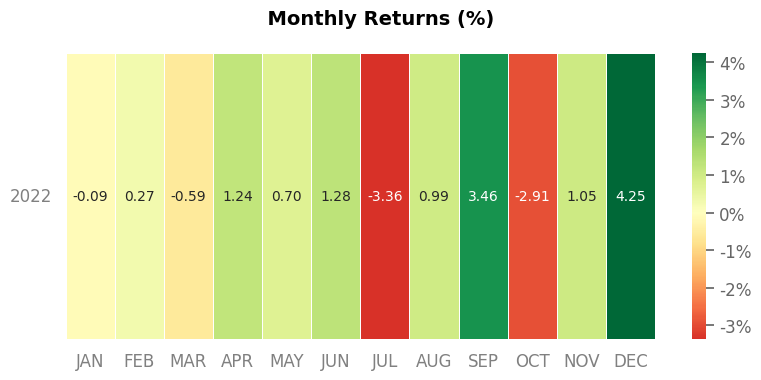

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


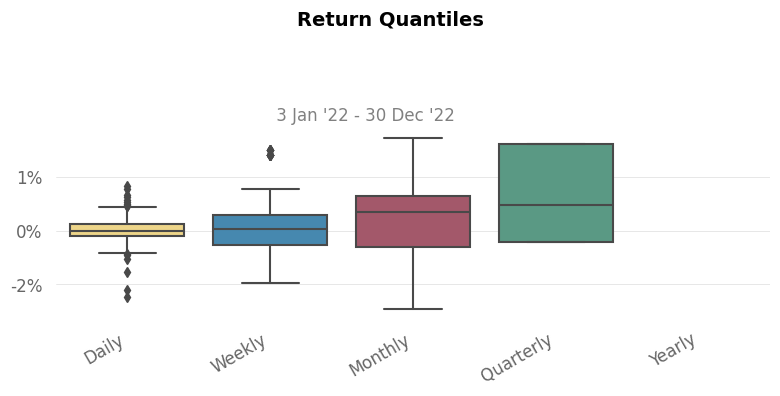

<IPython.core.display.Javascript object>

[[<Figure size 1000x600 with 4 Axes>]]

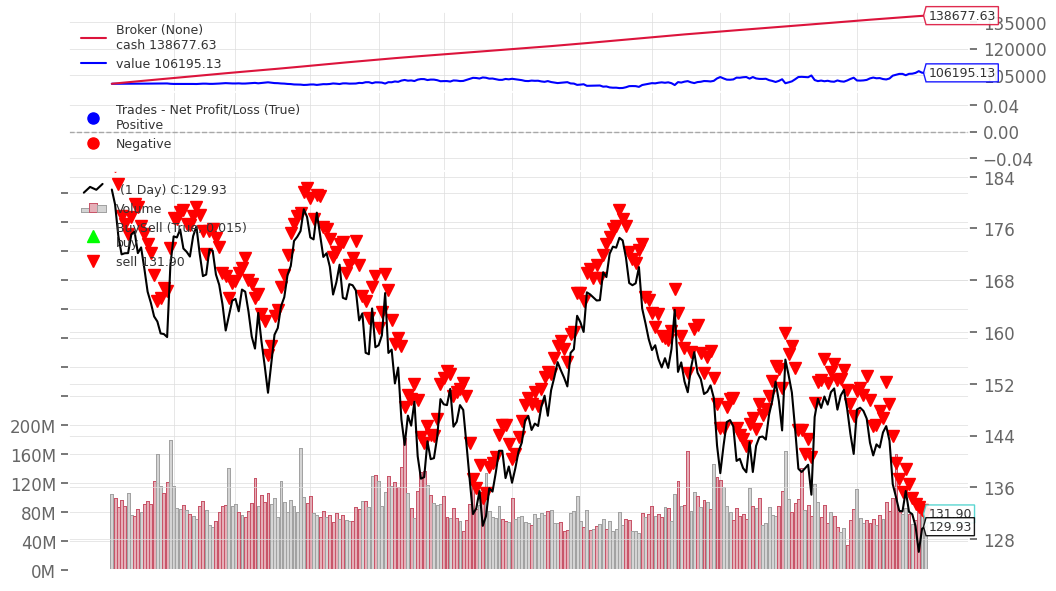

In [1]:
import pandas as pd
import alpaca_trade_api as tradeapi
import backtrader as bt
import quantstats as qs
import os

# Set up Alpaca API
API_KEY=os.getenv('API_KEY')
SECRET_KEY=os.getenv('SECRET_KEY')
BASE_URL = 'https://paper-api.alpaca.markets'

# Download stock price data using pandas_datareader
def download_stock_prices(SYMBOL, INTERVAL, start_date, end_date):
    api = tradeapi.REST(API_KEY, SECRET_KEY, base_url=BASE_URL, api_version='v2')
    stock_data = api.get_bars(symbol=SYMBOL, timeframe=INTERVAL, start=start_date, end=end_date).df
    return stock_data


# Calculate factor exposures using pyfolio
def calculate_factor_exposures(stock_prices):
    returns = stock_prices['close'].pct_change().dropna()
    factors = pd.DataFrame()

    # Example: Calculate volatility factor exposure
    factors['volatility'] = returns.rolling(window=30).std()

    # Example: Calculate growth factor exposure
    factors['growth'] = returns.rolling(window=30).mean()

    # Example: Calculate value factor exposure
    factors['value'] = stock_prices['close'] / stock_prices['close'].rolling(window=30).mean()

    factors = factors.dropna()
    return factors


# Implement the strategy logic using backtrader
class BarraFactorStrategy(bt.Strategy):
    def __init__(self):
        self.volatility_threshold = 0.2  # Example threshold for volatility factor
        self.growth_threshold = 0.05  # Example threshold for growth factor
        self.value_threshold = 1.2  # Example threshold for value factor

    def next(self):
        # Check factor exposures for current bar
        if self.datas[0].factor_exposures['volatility'][0] < self.volatility_threshold \
                and self.datas[0].factor_exposures['growth'][0] > self.growth_threshold \
                and self.datas[0].factor_exposures['value'][0] < self.value_threshold:
            # Buy signal
            self.buy()

        elif self.datas[0].factor_exposures['volatility'][0] > self.volatility_threshold \
                or self.datas[0].factor_exposures['growth'][0] < self.growth_threshold \
                or self.datas[0].factor_exposures['value'][0] > self.value_threshold:
            # Sell signal
            self.sell()


# Retrieve the necessary stock data
SYMBOL = 'AAPL'
INTERVAL = '1D'
start_date = pd.Timestamp('2022-01-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2023-01-01', tz='America/New_York').isoformat()

stock_prices = download_stock_prices(SYMBOL, INTERVAL, start_date, end_date)

# Calculate factor exposures
factor_exposures = calculate_factor_exposures(stock_prices)

# Create and run the backtest
cerebro = bt.Cerebro()

# Add the data feed to the backtest
data = bt.feeds.PandasData(dataname=stock_prices)
data.factor_exposures = factor_exposures
cerebro.adddata(data)

# Add the strategy to the backtest
cerebro.addstrategy(BarraFactorStrategy)

# Add the analyzer to the strategy
cerebro.addanalyzer(bt.analyzers.TimeReturn, _name='return')
print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())

# Set the initial capital
cerebro.broker.setcash(100000)

# Run the backtest
results = cerebro.run()
strat = results[0]

# print the final portfolio value return and profit
print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())
print('Portfolio Return: %.2f%%' % ((cerebro.broker.getvalue() / 100000 - 1) * 100))
print('Profit: %.2f' % (cerebro.broker.getvalue() - 100000))

strat_return = strat.analyzers.getbyname('return').get_analysis()
strat_return = list(strat_return.items())
index, values = zip(*strat_return)
strat_return = pd.Series(values, index=index)
qs.reports.full(strat_return)
cerebro.plot()